In [1]:
%matplotlib inline
from random import choice, randint, sample
from pprint import pprint
from re import compile, findall
from matplotlib import pyplot
import numpy
from numpy import array, cov, diag, dot, linalg, ones
from numpy import outer, random, sqrt, vstack, zeros

In [2]:
standard_genetic_code = {'UUU':'Phe', 'UUC':'Phe', 'UCU':'Ser', 'UCC':'Ser',
                         'UAU':'Tyr', 'UAC':'Tyr', 'UGU':'Cys', 'UGC':'Cys',
                         'UUA':'Leu', 'UCA':'Ser', 'UAA':'Stop','UGA':'Stop',
                         'UUG':'Leu', 'UCG':'Ser', 'UAG':'Stop','UGG':'Trp',
                         'CUU':'Leu', 'CUC':'Leu', 'CCU':'Pro', 'CCC':'Pro',
                         'CAU':'His', 'CAC':'His', 'CGU':'Arg', 'CGC':'Arg',
                         'CUA':'Leu', 'CUG':'Leu', 'CCA':'Pro', 'CCG':'Pro',
                         'CAA':'Gln', 'CAG':'Gln', 'CGA':'Arg', 'CGG':'Arg',
                         'AUU':'Ile', 'AUC':'Ile', 'ACU':'Thr', 'ACC':'Thr',
                         'AAU':'Asn', 'AAC':'Asn', 'AGU':'Ser', 'AGC':'Ser',
                         'AUA':'Ile', 'ACA':'Thr', 'AAA':'Lys', 'AGA':'Arg',
                         'AUG':'Met', 'ACG':'Thr', 'AAG':'Lys', 'AGG':'Arg',
                         'GUU':'Val', 'GUC':'Val', 'GCU':'Ala', 'GCC':'Ala',
                         'GAU':'Asp', 'GAC':'Asp', 'GGU':'Gly', 'GGC':'Gly',
                         'GUA':'Val', 'GUG':'Val', 'GCA':'Ala', 'GCG':'Ala', 
                         'GAA':'Glu', 'GAG':'Glu', 'GGA':'Gly', 'GGG':'Gly'}
amino_acid_code = {'Ala':'A', 'Cys':'C', 'Asp':'D', 'Glu':'E',
                   'Phe':'F', 'Gly':'G', 'His':'H', 'Ile':'I',
                   'Lys':'K', 'Leu':'L', 'Met':'M','Asn':'N',
                   'Pro':'P', 'Gln':'Q', 'Arg':'R','Ser':'S',
                   'Thr':'T', 'Val':'V', 'Trp':'W', 'Tyr':'Y',
                   'Stop':'_'}

In [3]:
# Code from PairwiseSequenceAlignmentClass.py
DNA_2 = {'G': {'G': 1, 'C': -3, 'A': -3, 'T': -3, 'N': 0},
         'C': {'G': -3, 'C': 1, 'A': -3, 'T': -3, 'N': 0},
         'A': {'G': -3, 'C': -3, 'A': 1, 'T': -3, 'N': 0},
         'T': {'G': -3, 'C': -3, 'A': -3, 'T': 1, 'N': 0},
         'N': {'G': 0, 'C': 0, 'A': 0, 'T': 0, 'N': 0}}
BLOSUM62 = {'A': {'A': 4, 'R': -1, 'N': -2, 'D': -2, 'C': 0, 'Q': -1, 'E': -1, 'G': 0, 'H': -2, 'I': -1,
                  'L': -1, 'K': -1, 'M': -1, 'F': -2, 'P': -1, 'S': 1, 'T': 0, 'W': -3, 'Y': -2, 'V': 0, 'X': 0},
            'R': {'A': -1, 'R': 5, 'N': 0, 'D': -2, 'C': -3, 'Q': 1, 'E': 0, 'G': -2, 'H': 0, 'I': -3,
                  'L': -2, 'K': 2, 'M': -1, 'F': -3, 'P': -2, 'S': -1, 'T': -1, 'W': -3, 'Y': -2, 'V': -3, 'X': 0},
            'N': {'A': -2, 'R': 0, 'N': 6, 'D': 1, 'C': -3, 'Q': 0, 'E': 0, 'G': 0, 'H': 1, 'I': -3,
                  'L': -3, 'K': 0, 'M': -2, 'F': -3, 'P': -2, 'S': 1, 'T': 0, 'W': -4, 'Y': -2, 'V': -3, 'X': 0},
            'D': {'A': -2, 'R': -2, 'N': 1, 'D': 6, 'C': -3, 'Q': 0, 'E': 2, 'G': -1, 'H': -1, 'I': -3,
                  'L': -4, 'K': -1, 'M': -3, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -4, 'Y': -3, 'V': -3, 'X': 0},
            'C': {'A': 0, 'R': -3, 'N': -3, 'D': -3, 'C': 9, 'Q': -3, 'E': -4, 'G': -3, 'H': -3, 'I': -1,
                  'L': -1, 'K': -3, 'M': -1, 'F': -2, 'P': -3, 'S': -1, 'T': -1, 'W': -2, 'Y': -2, 'V': -1, 'X': 0},
            'Q': {'A': -1, 'R': 1, 'N': 0, 'D': 0, 'C': -3, 'Q': 5, 'E': 2, 'G': -2, 'H': 0, 'I': -3,
                  'L': -2, 'K': 1, 'M': 0, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -2, 'Y': -1, 'V': -2, 'X': 0},
            'E': {'A': -1, 'R': 0, 'N': 0, 'D': 2, 'C': -4, 'Q': 2, 'E': 5, 'G': -2, 'H': 0, 'I': -3,
                  'L': -3, 'K': 1, 'M': -2, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -3, 'Y': -2, 'V': -2, 'X': 0},
            'G': {'A': 0, 'R': -2, 'N': 0, 'D': -1, 'C': -3, 'Q': -2, 'E': -2, 'G': 6, 'H': -2, 'I': -4,
                  'L': -4, 'K': -2, 'M': -3, 'F': -3, 'P': -2, 'S': 0, 'T': -2, 'W': -2, 'Y': -3, 'V': -3, 'X': 0},
            'H': {'A': -2, 'R': 0, 'N': 1, 'D': -1, 'C': -3, 'Q': 0, 'E': 0, 'G': -2, 'H': 8, 'I': -3,
                  'L': -3, 'K': -1, 'M': -2, 'F': -1, 'P': -2, 'S': -1, 'T': -2, 'W': -2, 'Y': 2, 'V': -3, 'X': 0},
            'I': {'A': -1, 'R': -3, 'N': -3, 'D': -3, 'C': -1, 'Q': -3, 'E': -3, 'G': -4, 'H': -3, 'I': 4,
                  'L': 2, 'K': -3, 'M': 1, 'F': 0, 'P': -3, 'S': -2, 'T': -1, 'W': -3, 'Y': -1, 'V': 3, 'X': 0},
            'L': {'A': -1, 'R': -2, 'N': -3, 'D': -4, 'C': -1, 'Q': -2, 'E': -3, 'G': -4, 'H': -3, 'I': 2,
                  'L': 4, 'K': -2, 'M': 2, 'F': 0, 'P': -3, 'S': -2, 'T': -1, 'W': -2, 'Y': -1, 'V': 1, 'X': 0},
            'K': {'A': -1, 'R': 2, 'N': 0, 'D': -1, 'C': -3, 'Q': 1, 'E': 1, 'G': -2, 'H': -1, 'I': -3,
                  'L': -2, 'K': 5, 'M': -1, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -3, 'Y': -2, 'V': -2, 'X': 0},
            'M': {'A': -1, 'R': -1, 'N': -2, 'D': -3, 'C': -1, 'Q': 0, 'E': -2, 'G': -3, 'H': -2, 'I': 1,
                  'L': 2, 'K': -1, 'M': 5, 'F': 0, 'P': -2, 'S': -1, 'T': -1, 'W': -1, 'Y': -1, 'V': 1, 'X': 0},
            'F': {'A': -2, 'R': -3, 'N': -3, 'D': -3, 'C': -2, 'Q': -3, 'E': -3, 'G': -3, 'H': -1, 'I': 0,
                  'L': 0, 'K': -3, 'M': 0, 'F': 6, 'P': -4, 'S': -2, 'T': -2, 'W': 1, 'Y': 3, 'V': -1, 'X': 0},
            'P': {'A': -1, 'R': -2, 'N': -2, 'D': -1, 'C': -3, 'Q': -1, 'E': -1, 'G': -2, 'H': -2, 'I': -3,
                  'L': -3, 'K': -1, 'M': -2, 'F': -4, 'P': 7, 'S': -1, 'T': -1, 'W': -4, 'Y': -3, 'V': -2, 'X': 0},
            'S': {'A': 1, 'R': -1, 'N': 1, 'D': 0, 'C': -1, 'Q': 0, 'E': 0, 'G': 0, 'H': -1, 'I': -2,
                  'L': -2, 'K': 0, 'M': -1, 'F': -2, 'P': -1, 'S': 4, 'T': 1, 'W': -3, 'Y': -2, 'V': -2, 'X': 0},
            'T': {'A': 0, 'R': -1, 'N': 0, 'D': -1, 'C': -1, 'Q': -1, 'E': -1, 'G': -2, 'H': -2, 'I': -1,
                  'L': -1, 'K': -1, 'M': -1, 'F': -2, 'P': -1, 'S': 1, 'T': 5, 'W': -2, 'Y': -2, 'V': 0, 'X': 0},
            'W': {'A': -3, 'R': -3, 'N': -4, 'D': -4, 'C': -2, 'Q': -2, 'E': -3, 'G': -2, 'H': -2, 'I': -3,
                  'L': -2, 'K': -3, 'M': -1, 'F': 1, 'P': -4, 'S': -3, 'T': -2, 'W': 11, 'Y': 2, 'V': -3, 'X': 0},
            'Y': {'A': -2, 'R': -2, 'N': -2, 'D': -3, 'C': -2, 'Q': -1, 'E': -2, 'G': -3, 'H': 2, 'I': -1,
                  'L': -1, 'K': -2, 'M': -1, 'F': 3, 'P': -3, 'S': -2, 'T': -2, 'W': 2, 'Y': 7, 'V': -1, 'X': 0},
            'V': {'A': 0, 'R': -3, 'N': -3, 'D': -3, 'C': -1, 'Q': -2, 'E': -2, 'G': -3, 'H': -3, 'I': 3,
                  'L': 1, 'K': -2, 'M': 1, 'F': -1, 'P': -2, 'S': -2, 'T': 0, 'W': -3, 'Y': -1, 'V': 4, 'X': 0},
            'X': {'A': 0, 'R': 0, 'N': 0, 'D': 0, 'C': 0, 'Q': 0, 'E': 0, 'G': 0, 'H': 0, 'I': 0,
                  'L': 0, 'K': 0, 'M': 0, 'F': 0, 'P': 0, 'S': 0, 'T': 0, 'W': 0, 'Y': 0, 'V': 0, 'X': 0}}


#
def sequenceAlign(seqA, seqB, simMatrix, insert=4, extend=2):
    #
    numI = len(seqA) + 1
    numI = len(seqA) + 1
    numJ = len(seqB) + 1

    #
    scoreMatrix = [[0] * numJ for x in range(numI)]
    routeMatrix = [[0] * numJ for x in range(numI)]

    #
    for i in range(1, numI):
        routeMatrix[i][0] = 1
    #
    for j in range(1, numJ):
        routeMatrix[0][j] = 2

        #
    for i in range(1, numI):
        for j in range(1, numJ):

            penalty1 = insert
            penalty2 = insert

            #
            if routeMatrix[i - 1][j] == 1:
                penalty1 = extend

            elif routeMatrix[i][j - 1] == 2:
                penalty2 = extend

                #
            similarity = simMatrix[seqA[i - 1]][seqB[j - 1]]

            #
            paths = [scoreMatrix[i - 1][j - 1] + similarity,  # 
                     scoreMatrix[i - 1][j] - penalty1,  # 
                     scoreMatrix[i][j - 1] - penalty2]  # 

            #
            best = max(paths)
            route = paths.index(best)

            #
            scoreMatrix[i][j] = best
            routeMatrix[i][j] = route

    #
    alignA = []
    alignB = []

    #
    i = numI - 1
    j = numJ - 1
    #
    score = scoreMatrix[i][j]

    #  
    while i > 0 or j > 0:
        #
        route = routeMatrix[i][j]
        #

        #
        if route == 0:  # 
            #
            alignA.append(seqA[i - 1])
            alignB.append(seqB[j - 1])
            i -= 1
            j -= 1

        elif route == 1:  # 
            alignA.append(seqA[i - 1])
            alignB.append('-')
            i -= 1

        elif route == 2:  # 
            alignA.append('-')
            alignB.append(seqB[j - 1])
            j -= 1

    # 
    alignA.reverse()
    alignB.reverse()
    #
    alignA = ''.join(alignA)
    alignB = ''.join(alignB)

    return score, alignA, alignB

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 23 19:58:42 2018

@author: Kerri Norton
"""

from matplotlib import pyplot

from random import randint, sample

from numpy import array, cov, diag, dot, linalg, ones
from numpy import outer, random, sqrt, vstack, zeros


def euclideanDist(vectorA, vectorB):
    diff = vectorA - vectorB

    return sqrt(dot(diff, diff))


def findNeighbours(data, distFunc, threshold):
    neighbourDict = {}

    n = len(data)
    for i in range(n):
        neighbourDict[i] = []

    for i in range(0, n - 1):
        for j in range(i + 1, n):
            dist = distFunc(data[i], data[j])

            if dist < threshold:
                neighbourDict[i].append(j)
                neighbourDict[j].append(i)

    return neighbourDict


def kMeans(data, k, centers=None):
    if centers is None:
        centers = array(sample(list(data), k))  # list() not needed in Python 2
    pprint(centers)
    change = 1.0
    prev = []

    while change > 1e-8:
        # pprint(change)
        clusters = [[] for x in range(k)]
        for vector in data:
            diffs = centers - vector
            dists = (diffs * diffs).sum(axis=1)
            closest = dists.argmin()
            clusters[closest].append(vector)

        change = 0
        for i, cluster in enumerate(clusters):
            cluster = array(cluster)
            center = cluster.sum(axis=0) / len(cluster)
            diff = center - centers[i]
            change += (diff * diff).sum()
            centers[i] = center

    return centers, clusters


def kMeansSpread(data, k):
    n = len(data)
    index = randint(0, n - 1)
    indices = set([index])

    influence = zeros(n)
    while len(indices) < k:
        diff = data - data[index]
        sumSq = (diff * diff).sum(axis=1) + 1.0
        influence += 1.0 / sumSq
        index = influence.argmin()

        while index in indices:
            index = randint(0, n - 1)

        indices.add(index)

    centers = vstack([data[i] for i in indices])

    return kMeans(data, k, centers)

def simpleCluster(data, threshold, distFunc=euclideanDist):
    neighbourDict = findNeighbours(data, distFunc, threshold)

    clusters = []
    pool = set(range(len(data)))

    while pool:
        i = pool.pop()
        neighbours = neighbourDict[i]
        cluster = set()
        cluster.add(i)

        pool2 = set(neighbours)
        while pool2:
            j = pool2.pop()

            if j in pool:
                pool.remove(j)
                cluster.add(j)
                neighbours2 = neighbourDict[j]
                pool2.update(neighbours2)

        clusters.append(cluster)

    clusterData = []
    for cluster in clusters:
        clusterData.append([data[i] for i in cluster])

    return clusterData

In [5]:
def generate_additional_sequences(original_number_of_sequences=3, 
                                  length_of_each_sequence=60):
    
    default_nucleotides = "ATCG"
    
    def generate_sequence_with_length(length_of_sequence):
        return "".join([choice(default_nucleotides) 
                        for _ in range(length_of_sequence)])
    
    def crossover(sequence_1, sequence_2):
        sequence_1_length = len(sequence_1)
        sequence_2_length = len(sequence_2)
        if sequence_1_length != sequence_2_length:
            raise Exception(("Can not perform crossover on strings of different lengths: {} and {}"
                             .format(sequence_1_length, sequence_2_length)))
        
        crossover_index = randint(1, sequence_2_length - 2)
        
        sequence_2_first, sequence_2_second = sequence_2[:crossover_index], sequence_2[crossover_index:]
        sequence_1_first, sequence_1_second = sequence_1[:crossover_index], sequence_1[crossover_index:]
        
        return sequence_1_first + sequence_2_second, sequence_2_first + sequence_1_second
        
    def mutation(sequence, kind):
        mutation_index = randint(0, len(sequence) - 1)

        if kind == "point":
            mutation_index_nucleotide = sequence[mutation_index]

            mutation_beginning = sequence[:mutation_index]
            mutation_middle = choice(default_nucleotides.replace(mutation_index_nucleotide, ""))
            mutation_end = sequence[mutation_index + 1:]

            mutation_final = mutation_beginning + mutation_middle + mutation_end

            if mutation_final == sequence:
                mutation_final = point_mutation(sequence)

            return mutation_final

        elif kind == "insertion":
            return sequence[:mutation_index] + choice(default_nucleotides) + sequence[mutation_index:]

        elif kind == "deletion":
            return sequence[:mutation_index] + sequence[mutation_index + 1:]

        elif kind == "copy number addition":
            for i in range(3, (len(sequence)//2) + 1):
                kmers = [sequence[j:j + i] for j in range(len(sequence) - i + 1)]
                for k, el in enumerate(kmers):
                    if k + i < len(kmers) and el == kmers[k + i]:
                        match_index = k + (i * 2)
                        return sequence[:match_index] + el + sequence[match_index:]

        elif kind == "copy number subtraction":
            for i in range(3, (len(sequence)//2) + 1):
                kmers = [sequence[j:j + i] for j in range(len(sequence) - i + 1)]
                for k, el in enumerate(kmers):
                    if k + i < len(kmers) and el == kmers[k + i]:
                        match_index = k + (i * 2)
                        return sequence[:match_index - i] + sequence[match_index:]

        else:
            raise Exception("Invalid mutation type: {}".format(kind))
            
    def try_again_for_valid_sequences(sequence, mutation_options=["point", "insertion", "deletion", 
                                                                  "copy number addition", 
                                                                  "copy number subtraction"]):
        
        options = [mutation(sequence, choice(mutation_options)) for _ in range(7)]
        if None in options:
            options = try_again_for_valid_sequences(sequence)
        return options
    
    def convert_to_amino_acids(sequence):
        pattern = compile(r".{3}")
        return "".join([amino_acid_code[standard_genetic_code[codon]] 
                        for codon in pattern.findall(sequence.replace("T", "U"))]).replace("_", "")
    sequences_list = [{"original_sequence": generate_sequence_with_length(length_of_each_sequence), 
                       "mutated_sequences": []} for _ in range(original_number_of_sequences)]
    
    for dictionary in sequences_list:
        dictionary["mutated_sequences"] += try_again_for_valid_sequences(dictionary["original_sequence"])
        crossover_options = [sequence for sequence in dictionary["mutated_sequences"] 
                             if len(sequence) == len(dictionary["original_sequence"])]
        dictionary["mutated_sequences"] += list(crossover(dictionary["original_sequence"], 
                                                          choice(crossover_options)))
    
        
    return {"nucleotides": sequences_list, 
            "amino_acids": [{"original_sequence": convert_to_amino_acids(dictionary["original_sequence"]), 
                             "mutated_sequences": [convert_to_amino_acids(sequence) 
                                                   for sequence in dictionary["mutated_sequences"]]} 
                            for dictionary in sequences_list]}

In [6]:
def caluclate_similarity_matrices():
    both_datasets = generate_additional_sequences()
    pprint(both_datasets)
    nucleotide_scores_matrix = []
    for dictionary in both_datasets["nucleotides"]:
        nucleotide_scores_matrix.append([sequenceAlign(dictionary["original_sequence"], 
                                                       mutated_sequence, DNA_2)[0] 
                                         for mutated_sequence in dictionary["mutated_sequences"]])
    amino_acid_scores_matrix = []
    for dictionary in both_datasets["amino_acids"]:
        amino_acid_scores_matrix.append([sequenceAlign(dictionary["original_sequence"], 
                                                       mutated_sequence, BLOSUM62, insert=8, extend=4)[0] 
                                         for mutated_sequence in dictionary["mutated_sequences"]])
    # pprint(nucleotide_scores_matrix)
    # pprint(amino_acid_scores_matrix)
    nucleotide_scores = [score for row in nucleotide_scores_matrix for score in row]
    amino_acid_scores = [score for row in amino_acid_scores_matrix for score in row]
    
    return [list(r) for r in list(zip(nucleotide_scores, amino_acid_scores))]

In [7]:
data = array(caluclate_similarity_matrices(), dtype=numpy.float32)

{'amino_acids': [{'mutated_sequences': ['SFATHSTVSFKDLILTRDG',
                                        'SFATPHRLVIQGLNSNEGR',
                                        'SFATHSTVSFKGLNSNEGR',
                                        'SFATHSTVSFKDLILTRGC',
                                        'SFATHSTVSFKDLILTRA',
                                        'SFATHSTVSFNGLNSNEGR',
                                        'SFATHGTVSFKDLILTRGG',
                                        'SFATHSTVSFKDLILTRGG',
                                        'SFATHGTVSFKDLILTRGG'],
                  'original_sequence': 'SFATHSTVSFKDLILTRGG'},
                 {'mutated_sequences': ['MPCRFGFADKQPKASKMM',
                                        'MPCCCRFGFADKQPKASKMM',
                                        'MPCCRFGFADSNQRRVK',
                                        'MPCCRFGFADKQPNGEND',
                                        'MPCCRFGFAAKQPKASKMM',
                                        'MPCCIRLIRATKGEND'

In [8]:
pprint(data)

array([[ 56.,  88.],
       [ 56.,  17.],
       [ 56.,  57.],
       [ 56.,  86.],
       [ 55.,  75.],
       [ 56.,  52.],
       [ 56.,  91.],
       [ 60.,  95.],
       [ 56.,  91.],
       [ 49.,  91.],
       [ 52., 100.],
       [ 55.,  54.],
       [ 56.,  69.],
       [ 56., 100.],
       [ 56.,   5.],
       [ 55.,  54.],
       [ 56., 100.],
       [ 60., 108.],
       [ 55., -12.],
       [ 55.,  79.],
       [ 52.,  84.],
       [ 49.,  78.],
       [ 56.,  86.],
       [ 52.,  84.],
       [ 52.,  84.],
       [ 56.,  86.],
       [ 60.,  92.]], dtype=float32)


Simple Clusters:
[[array([56., 88.], dtype=float32),
  array([56., 86.], dtype=float32),
  array([55., 75.], dtype=float32),
  array([56., 91.], dtype=float32),
  array([60., 95.], dtype=float32),
  array([56., 91.], dtype=float32),
  array([49., 91.], dtype=float32),
  array([ 52., 100.], dtype=float32),
  array([56., 69.], dtype=float32),
  array([ 56., 100.], dtype=float32),
  array([ 56., 100.], dtype=float32),
  array([ 60., 108.], dtype=float32),
  array([55., 79.], dtype=float32),
  array([52., 84.], dtype=float32),
  array([49., 78.], dtype=float32),
  array([56., 86.], dtype=float32),
  array([52., 84.], dtype=float32),
  array([52., 84.], dtype=float32),
  array([56., 86.], dtype=float32),
  array([60., 92.], dtype=float32)],
 [array([56., 17.], dtype=float32)],
 [array([56., 57.], dtype=float32),
  array([55., 54.], dtype=float32),
  array([56., 52.], dtype=float32),
  array([55., 54.], dtype=float32)],
 [array([56.,  5.], dtype=float32)],
 [array([ 55., -12.], dtype=float32

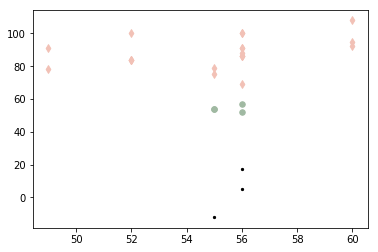

In [9]:
clusters = simpleCluster(data, 10)
print("Simple Clusters:")
pprint(clusters)
colors = ['#F2C1B6','#A0B9A2','#F0A050',
          '#C0F0A0','#80A0B0','#B0A0C0']

markers = ['d','o','s','>','^']

i = 0
for cluster in clusters:
    allX, allY = zip(*cluster)

    if len(cluster) > 3:
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        pyplot.scatter(allX, allY, s=30, c=color, marker=marker)
        i += 1

    else:
        pyplot.scatter(allX, allY, s=5, c='black', marker='o')

pyplot.show()

array([[56., 86.],
       [55., 79.],
       [60., 95.]], dtype=float32)
K-Means Clusters:
[[array([56., 88.], dtype=float32),
  array([56., 86.], dtype=float32),
  array([55., 75.], dtype=float32),
  array([56., 91.], dtype=float32),
  array([56., 91.], dtype=float32),
  array([49., 91.], dtype=float32),
  array([56., 69.], dtype=float32),
  array([55., 79.], dtype=float32),
  array([52., 84.], dtype=float32),
  array([49., 78.], dtype=float32),
  array([56., 86.], dtype=float32),
  array([52., 84.], dtype=float32),
  array([52., 84.], dtype=float32),
  array([56., 86.], dtype=float32)],
 [array([56., 17.], dtype=float32),
  array([56., 57.], dtype=float32),
  array([56., 52.], dtype=float32),
  array([55., 54.], dtype=float32),
  array([56.,  5.], dtype=float32),
  array([55., 54.], dtype=float32),
  array([ 55., -12.], dtype=float32)],
 [array([60., 95.], dtype=float32),
  array([ 52., 100.], dtype=float32),
  array([ 56., 100.], dtype=float32),
  array([ 56., 100.], dtype=float32),

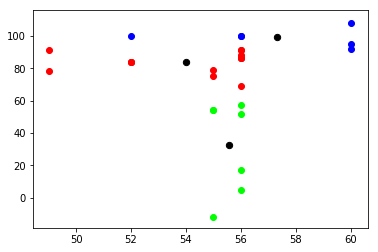

In [10]:
centers, clusters = kMeans(data, 3)
print("K-Means Clusters:")
pprint(clusters)
# display graph in colored clusters
colors = ['#FF0000', '#00FF00', '#0000FF',
          '#FFFF00', '#00FFFF', '#FF00FF']

for i, cluster in enumerate(clusters):
    x, y = zip(*cluster)
    color = colors[i % len(colors)]
    pyplot.scatter(x, y, c=color, marker='o')

x, y = zip(*centers)

pyplot.scatter(x, y, s=40, c='black', marker='o')
pyplot.show()